### Convert excel file to csv

In [3]:
! in2csv -e iso-8859-1 "COPYFOIA 46224_Modular NI and SCR Age of R01 Eq Awds and Awdees 136-17_KP_CW_JW 04 06 2017_Approved_Unlocked.xlsx" > nih-by-age-sandbox.csv

/Users/c.ryan/anaconda/lib/python2.7/site-packages/openpyxl/workbook/names/named_range.py:121: UserWarning: Discarded range with reserved name
  warnings.warn("Discarded range with reserved name")


### Remove the empty lines and 'Report #136-17' header

In [4]:
! grep -v ",,,,," nih-by-age-sandbox.csv > temp && mv temp nih-by-age-sandbox.csv 

### Count number of lines / PIs 

In [6]:
! wc -l nih-by-age-sandbox.csv

    7645 nih-by-age-sandbox.csv


In [7]:
! csvcut -n nih-by-age-sandbox.csv

  1: Award Number
  2: Investigator Number
  3: Modular
  4: New Investigator
  5: Special Council Review
  6: Age


### Load pandas

In [1]:
import pandas

### Load the data into a dataframe

In [2]:
nih_df = pandas.read_csv("./nih-by-age-sandbox.csv")
nih_df.head()

,Award Number,Investigator Number,Modular,New Investigator,Special Council Review,Age
0,1,1,Y,N,N,47.0
1,2,1,Y,Y,N,37.0
2,3,1,N,N,N,55.0
3,4,1,N,N,N,66.0
4,5,1,N,Y,N,NaN


In [3]:
nih_df["Age"].describe()

count    7066.00000
mean       51.16544
std         9.56620
min        27.00000
25%        44.00000
50%        50.00000
75%        58.00000
max        89.00000
Name: Age, dtype: float64

In [4]:
# Award Nuber 82 has two PIs attached to it
nih_df[nih_df["Award Number"] == 82]

,Award Number,Investigator Number,Modular,New Investigator,Special Council Review,Age
86,82,1,Y,N,N,57.0
87,82,2,Y,N,N,89.0


In [5]:
# Remove the rows relating to PIs without an age
print(len(nih_df))
nih_df.dropna(inplace=True)
print(len(nih_df))

7644
7066


In [6]:
by_award = nih_df.groupby("Award Number")
by_award

In [7]:
def find_min_age(df):
    """Take in a dataframe with two or more rows.
    Return a dataframe with just one row, the row containing the lowest age"""
    lowest_df = df[df["Age"] == df["Age"].min()]
    return lowest_df

In [8]:
youngest_by_award = by_award.apply(find_min_age)
youngest_by_award.head()

,,Award Number,Investigator Number,Modular,New Investigator,Special Council Review,Age
Award Number,,,,,,,
1,0,1,1,Y,N,N,47.0
2,1,2,1,Y,Y,N,37.0
3,2,3,1,N,N,N,55.0
4,3,4,1,N,N,N,66.0
6,5,6,1,N,Y,N,52.0


In [10]:
# Reset the index
youngest_by_award.drop("Award Number", axis=1, inplace=True)
youngest_by_award.reset_index(inplace=True)
youngest_by_award.head()

,Award Number,level_1,Investigator Number,Modular,New Investigator,Special Council Review,Age
0,1,0,1,Y,N,N,47.0
1,2,1,1,Y,Y,N,37.0
2,3,2,1,N,N,N,55.0
3,4,3,1,N,N,N,66.0
4,6,5,1,N,Y,N,52.0


In [11]:
youngest_by_award.drop("level_1", axis=1, inplace=True)
youngest_by_award.head()

,Award Number,Investigator Number,Modular,New Investigator,Special Council Review,Age
0,1,1,Y,N,N,47.0
1,2,1,Y,Y,N,37.0
2,3,1,N,N,N,55.0
3,4,1,N,N,N,66.0
4,6,1,N,Y,N,52.0


In [12]:
# Confirm that the age that corresponds to award 82 is 57
youngest_by_award[youngest_by_award["Award Number"] == 82]

,Award Number,Investigator Number,Modular,New Investigator,Special Council Review,Age
75,82,1,Y,N,N,57.0


In [13]:
# Can he bin the awards by age group to see total awards in each group?
# 27-30, 31-35, 36-40, 41-45, 46-50, 51-55, 56-60, 61-65, 66-70, 71-75, 76-89
labels = ["25-30", "31-35", "36-40", "41-45", "46-50", "51-55", "56-60", "61-65", "66-70", "71-75", "76-80", "81-85"]

In [14]:
youngest_by_award["age_group"] = pandas.cut(youngest_by_award["Age"], range(25, 90, 5), right=True, labels=labels)
youngest_by_award.head()

,Award Number,Investigator Number,Modular,New Investigator,Special Council Review,Age,age_group
0,1,1,Y,N,N,47.0,46-50
1,2,1,Y,Y,N,37.0,36-40
2,3,1,N,N,N,55.0,51-55
3,4,1,N,N,N,66.0,66-70
4,6,1,N,Y,N,52.0,51-55


# How many awards in each age group

In [15]:
import numpy as np
import matplotlib.pyplot as plt
pandas.set_option('max_columns', 50)
%matplotlib inline

In [16]:
youngest_by_award.groupby("age_group").agg({"Age": [np.size]})

,Age
,size
age_group,
25-30,4.0
31-35,157.0
36-40,775.0
41-45,1187.0
46-50,1126.0
51-55,954.0
56-60,728.0
61-65,474.0


In [17]:
group_by_age = youngest_by_award.groupby("age_group").size().to_frame("Number of awards")
group_by_age

,Number of awards
age_group,
25-30,4
31-35,157
36-40,775
41-45,1187
46-50,1126
51-55,954
56-60,728
61-65,474
66-70,238


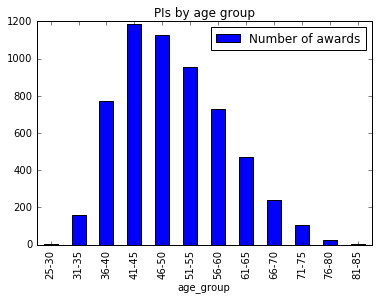

In [18]:
ax = group_by_age.plot(kind="bar", title="PIs by age group")

### How many grants going to PIs age 45 and younger were N for modular funding (column C)?

In [19]:
youngest_by_award[(youngest_by_award["Age"] <= 45) & (youngest_by_award["Modular"] == "N")].head()

,Award Number,Investigator Number,Modular,New Investigator,Special Council Review,Age,age_group
22,26,1,N,N,N,43.0,41-45
43,49,1,N,N,N,43.0,41-45
46,52,1,N,N,N,44.0,41-45
49,55,1,N,Y,Y,37.0,36-40
68,75,1,N,N,Y,39.0,36-40


In [20]:
len(youngest_by_award[(youngest_by_award["Age"] <= 45) & (youngest_by_award["Modular"] == "N")])

1152

### How many grants going to PIs age 50 and older were Y for NI status (column D)?

In [21]:
youngest_by_award[(youngest_by_award["Age"] >= 50) & (youngest_by_award["New Investigator"] == "Y")].head()

,Award Number,Investigator Number,Modular,New Investigator,Special Council Review,Age,age_group
4,6,1,N,Y,N,52.0,51-55
69,76,2,Y,Y,N,50.0,46-50
86,93,1,Y,Y,N,51.0,51-55
94,101,1,Y,Y,N,50.0,46-50
124,131,1,Y,Y,N,50.0,46-50


In [132]:
len(youngest_by_award[(youngest_by_award["Age"] >= 50) & (youngest_by_award["New Investigator"] == "Y")])

211

### How many grants going to PIs age 45 and younger were Y for SCR (column E)?

In [134]:
youngest_by_award[(youngest_by_award["Age"] <= 45) & (youngest_by_award["Special Council Review"] == "Y")].head()

,Award Number,Investigator Number,Modular,New Investigator,Special Council Review,Age,age_group
49,55,1,N,Y,Y,37.0,36-40
68,75,1,N,N,Y,39.0,36-40
84,91,1,Y,N,Y,45.0,41-45
285,302,2,N,N,Y,43.0,41-45
348,368,1,N,N,Y,45.0,41-45


In [135]:
len(youngest_by_award[(youngest_by_award["Age"] <= 45) & (youngest_by_award["Special Council Review"] == "Y")])

186

### Number of grants in 2016 above and below $250,000 (modular funding is generally below 250,000)

In [22]:
# Total number of grants
len(youngest_by_award)

5775

In [24]:
# Number of grants with modular funding
len(youngest_by_award[ youngest_by_award["Modular"] == "Y"])

2446

In [25]:
# Number of grants without modular funding
len(youngest_by_award[ youngest_by_award["Modular"] == "N"])

3329

### Proportion of each section that are held by Investigators 45 and younger

In [26]:
# Number of grants with modular funding held by investigators 45 and younger
len(youngest_by_award[ (youngest_by_award["Modular"] == "Y") & (youngest_by_award["Age"] <= 45) ])

971

In [28]:
# Number of grants with modular funding held by investigators older than 45
len(youngest_by_award[ (youngest_by_award["Modular"] == "Y") & (youngest_by_award["Age"] > 45) ])

1475

In [29]:
# Number of grants without modular funding held by investigators 45 and younger
len(youngest_by_award[ (youngest_by_award["Modular"] == "N") & (youngest_by_award["Age"] <= 45) ])

1152

In [30]:
# Number of grants without modular funding held by investigators older than 45
len(youngest_by_award[ (youngest_by_award["Modular"] == "N") & (youngest_by_award["Age"] > 45) ])

2177

### Proportion of each section that are held by New Investigators

In [32]:
# Number of grants with modular funding held by new investigators
len(youngest_by_award[ (youngest_by_award["Modular"] == "Y") & (youngest_by_award["New Investigator"] == "Y") ])

816

In [33]:
# Number of grants with modular funding held by NOT new investigators
len(youngest_by_award[ (youngest_by_award["Modular"] == "Y") & (youngest_by_award["New Investigator"] == "N") ])

1629

In [47]:
youngest_by_award[ (youngest_by_award["Modular"] == "Y") & (youngest_by_award["New Investigator"] != "Y") & (youngest_by_award["New Investigator"] != "N")]

,Award Number,Investigator Number,Modular,New Investigator,Special Council Review,Age,age_group
1621,1705,1,Y,M,N,47.0,46-50


In [49]:
# 1 is listed as M
len(youngest_by_award[(youngest_by_award["Modular"] == "Y") & (youngest_by_award["New Investigator"] != "Y") & (youngest_by_award["New Investigator"] != "N")])

1

In [45]:
# Number of grants with non-modular funding held by new investigators
len(youngest_by_award[ (youngest_by_award["Modular"] == "N") & (youngest_by_award["New Investigator"] == "Y") ])

771

In [46]:
# Number of grants with non-modular funding held by NOT new investigators
len(youngest_by_award[ (youngest_by_award["Modular"] == "N") & (youngest_by_award["New Investigator"] == "N") ])

2550

In [50]:
youngest_by_award[ (youngest_by_award["Modular"] == "N") & (youngest_by_award["New Investigator"] != "Y") & (youngest_by_award["New Investigator"] != "N")]

,Award Number,Investigator Number,Modular,New Investigator,Special Council Review,Age,age_group
61,67,1,N,M,N,74.0,71-75
2009,2106,3,N,M,N,50.0,46-50
2181,2286,1,N,M,N,66.0,66-70
2435,2554,2,N,M,N,45.0,41-45
2631,2762,1,N,M,N,48.0,46-50
3002,3156,3,N,M,N,42.0,41-45
4625,4851,1,N,M,N,41.0,41-45
5614,5894,2,N,M,N,42.0,41-45


In [51]:
# 8 are listed as M
len(youngest_by_award[(youngest_by_award["Modular"] == "N") & (youngest_by_award["New Investigator"] != "Y") & (youngest_by_award["New Investigator"] != "N")])

8